<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/ML_20_Naive_Bayes_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Algorithm
Naive Bayes is a supervised learning algorithm used for classification tasks. Hence, it is also called Naive Bayes Classifier.

As other supervised learning algorithms, naive bayes uses features to make a prediction on a target variable. The key difference is that naive bayes assumes that features are independent of each other and there is no correlation between features. However, this is not the case in real life. This naive assumption of features being uncorrelated is the reason why this algorithm is called “naive”.

In this post, I will first cover some basic concepts on probability and show how Bayes’ Theorem, the core of naive bayes classifier, is derived. Then I will show how naive bayes classifier builds up on Bayes’ Theorem as well as advantages/disadvantages of naive bayes and its implementation on scikit-learn.

#Outline:

1. Probability and conditional probability
2. Bayes’ Theorem
3. Naive Bayes classifier
4. Pros and cons of naive Bayes classifier
5. Scikit-learn implementation

# Probability and conditional probability
We’ve learned where the “naive” comes from. How about the “bayes”? Bayes comes from the famous Bayes’ Theorem of Thomas Bayes. To get a comprehensive understanding of Bayes’ Theorem, we should talk about probability and conditional probability first.

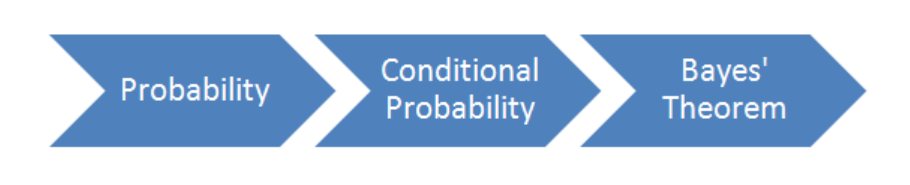



Probability simply means the likelihood of an event to occur and always takes a value between 0 and 1 (0 and 1 inclusive). The probability of event A is denoted as p(A) and calculated as the number of the desired outcome divided by the number of all outcomes. For example, when you roll a die, the probability of getting a number less than three is 2 / 6. The number of desired outcomes is 2 (1 and 2); the number of total outcomes is 6.

Conditional probability is the likelihood of an event A to occur given that another event that has a relation with event A has already occurred. Suppose that we have 6 blue balls and 4 yellows placed in two boxes as seen below. I ask you to randomly pick a ball. The probability of getting a blue ball is 6 / 10 = 0,6. What if I ask you to pick a ball from box A? The probability of picking a blue ball clearly decreases. The condition here is to pick from box A which clearly changes the probability of the event (picking a blue ball). The probability of event A given that event B has occurred is denoted as p(A|B).

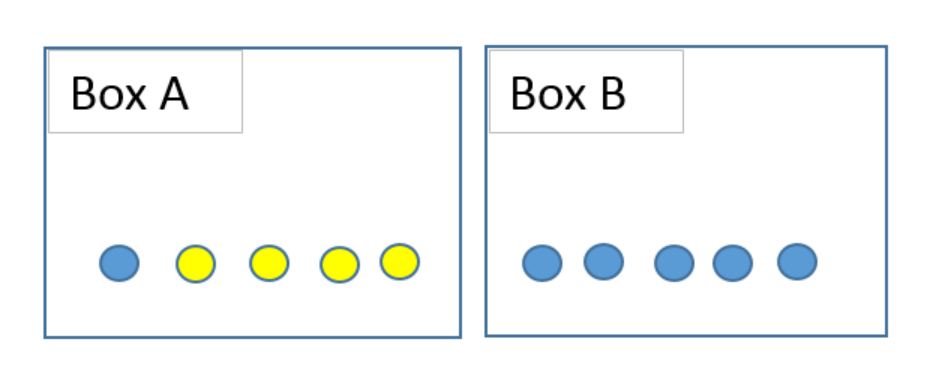

There is one more concept to learn before introducing Bayes’ Theorem. A joint **probability** is the probability of two events occurring together and denoted as **p(A and B)**. For independent events, joint probability can be written as:

**p(A and B) = p(A).p(B) ……… (1)**

Let’s say I roll a die and flip a coin. The probability of getting 1 and heads is:

(1 / 6).(1/2) = 1/12 = 0.08

For this calculation to be correct, events must be **independent.** The outcome of flipping a coin does not have any effect on the outcome of rolling a die so these events are independent. Let’s also give an example of **dependent** events. I picked one card from a deck and picked a second card from the same deck. The probability of a particular observation in the second pick certainly effected by the first pick. In the case of dependent events, equation 1 is not valid. It should be slightly changed to hold for any two events:

**p(A and B) = p(A).p(B|A) ……… (2)**

Equation (1) is a special case of equation (2) for independent events because if event B and event A independent, **p(B|A) = p(B).**

# Bayes’ Theorem
We will start with the fact that joint probability is commutative for any two events. That is:

**p(A and B) = p(B and A) ……… (3)**

From equation 2, we know that:

p(A and B) = p(A).p(B|A)

p(B and A) = p(B).p(A|B)

We can rewrite equation 3 as:

p(A).p(B|A) = p(B).p(A|B)

Dividing two sides by p(B) gives us the Bayes’ Theorem:

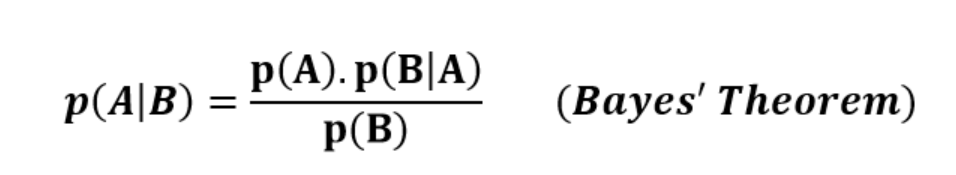

Now we have an understanding of Bayes’ Theorem. It’s time to see how Naive bayes classifier uses this theorem.

# Naive Bayes Classifier
**Naive bayes is a supervised learning algorithm for classification so the task is to find the class of observation (data point) given the values of features. Naive bayes classifier calculates the probability of a class given a set of feature values (i.e. p(yi | x1, x2 , … , xn)).** Input this into Bayes’ theorem:

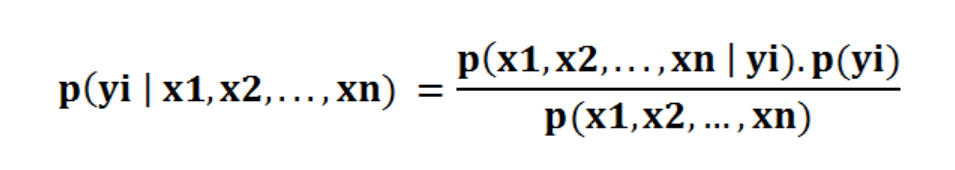

**p(x1, x2 , … , xn | yi)** means the probability of a specific combination of features given a class label. To be able to calculate this, we need extremely large datasets to have an estimate on the probability distribution for all different combinations of feature values. To overcome this issue, naive bayes algorithm **assumes that all features are independent of each other.** Furthermore, denominator (p(x1,x2, … , xn)) can be removed to simplify the equation because it only normalizes the value of conditional probability of a class given an observation ( p(yi | x1,x2, … , xn)).

The probability of a class ( p(yi) ) is very simple to calculate:

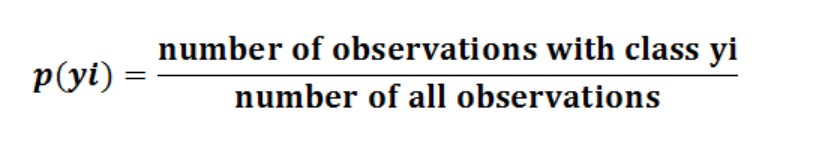

Under the assumption of features being independent, **p(x1, x2 , … , xn | yi)** can be written as:

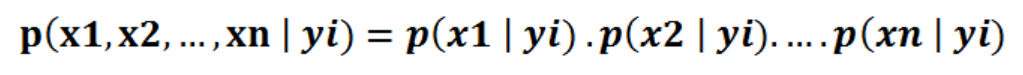

The conditional probability for a single feature given the class label (i.e. p(x1 | yi) ) can be more easily estimated from the data. The algorithm needs to store probability distributions of features for each class independently. For example, if there are 5 classes and 10 features, 50 different probability distributions need to be stored. The type of distributions depend on the characteristics of features:

* For binary features (Y/N, True/False, 0/1): Bernoulli distribution
* For discrete features (i.e. word counts): Multinomial distribution
* For continuous features: Gaussian (Normal) distribution

It is common to name the naive bayes with the distribution of features (i.e. Gaussian naive bayes classifier). For mixed type datasets, a different type of distribution may be required for different features.

Adding all these up, it became an easy task for naive bayes algorithm to calculate the probability to observe a class given values of features (p(yi | x1, x2 , … , xn) )

# Pros and Cons of Naive Bayes Algorithm
* Pros:

The assumption that all features are independent makes naive bayes algorithm very fast compared to complicated algorithms. In some cases, speed is preferred over higher accuracy.
It works well with high-dimensional data such as text classification, email spam detection.
* Cons:

The assumption that all features are independent is not usually the case in real life so it makes naive bayes algorithm less accurate than complicated algorithms. Speed comes at a cost!

# Types of Naive Bayes Classifier:
## 1. Multinomial Naive Bayes:
This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

## 2. Bernoulli Naive Bayes:
This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

## 3. Gaussian Naive Bayes:
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

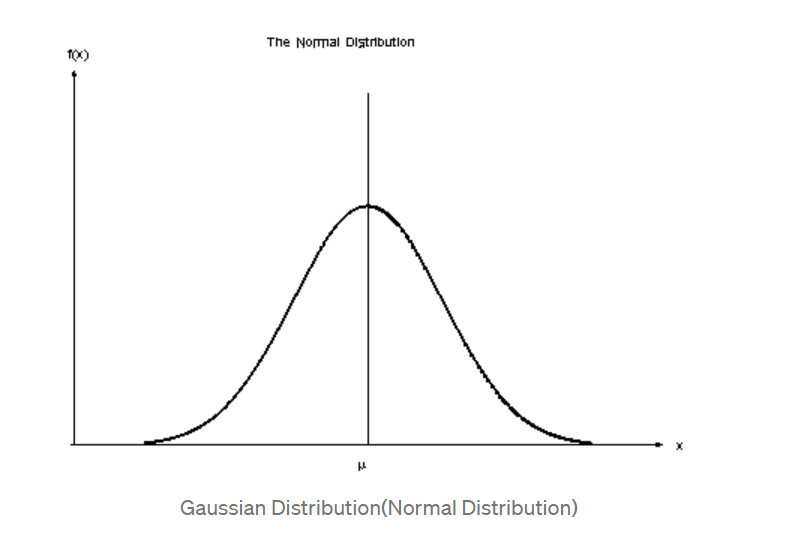

Since the way the values are present in the dataset changes, the formula for conditional probability changes to,

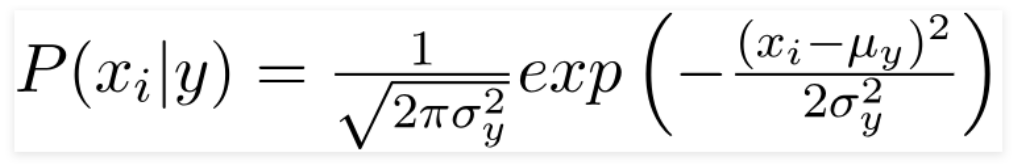

# Implementation in Python



In [1]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)


Gaussian Naive Bayes model accuracy(in %): 95.0
